In [7]:
!for file in ../gitig/log/20190424*; do echo '\n'; egrep 'note' ${file}; echo ${file}; echo ' (validation accuracy) \n'; egrep 'validation accuracy:' ${file} | grep -Po 'y: \d.\d+' | perl -pe 's/y: /, /; s/\n//'; echo '\nTraining loss:\n'; egrep 'validation accuracy:' ${file} | grep -Po 's: \d.\d+' | perl -pe 's/s: /, /; s/\n//'; echo '\nValidation loss:\n'; egrep 'Validation loss:' ${file} | grep -Po 's: \d.\d+' | perl -pe 's/s: /, /; s/\n//'; done



[note]
note = final experiment, ablation, no pretraining, architectue: cosine_sim encoder, ablation
../gitig/log/20190424-194924.txt
 (validation accuracy) 

, 0.16, 0.15, 0.17, 0.19, 0.17, 0.21, 0.23, 0.2, 0.24, 0.21, 0.18, 0.2, 0.21, 0.21, 0.3, 0.3, 0.35, 0.32, 0.34, 0.35, 0.37, 0.37, 0.36, 0.36, 0.36, 0.35, 0.37, 0.35, 0.36, 0.36, 0.38, 0.37, 0.34, 0.39, 0.37, 0.35, 0.37, 0.33, 0.36, 0.36, 0.36, 0.37, 0.37, 0.35, 0.35, 0.36, 0.38, 0.37, 0.38, 0.38
Training loss:

, 0.3069475924659546, 0.2586939105876261, 0.23312578824212082, 0.20786804574269885, 0.19037703893677613, 0.18001670150116378, 0.17734881909143843, 0.17149501614808743, 0.15805185594030086, 0.15923815837363867, 0.1581163472945488, 0.15590300264150778, 0.1477053053463401, 0.14283800392735693, 0.13963460739929265, 0.09320729174226386, 0.08277353108070874, 0.08235845264833443, 0.07815060140370446, 0.074236157242063, 0.07606471696775995, 0.0717772903582226, 0.07131161410492765, 0.0710717507034748, 0.07081011042829949, 0.069573

In [12]:
# shared encoder architecture

# 20190424-194924.txt, no pretraining, architectue: cosine_sim encoder, ablation
acc_cosim_abl = [0.16, 0.15, 0.17, 0.19, 0.17, 0.21, 0.23, 0.2, 0.24, 0.21, 0.18, 0.2, 0.21, 0.21, 0.3, 0.3, 0.35, 0.32, 0.34, 0.35, 0.37, 0.37, 0.36, 0.36, 0.36, 0.35, 0.37, 0.35, 0.36, 0.36, 0.38, 0.37, 0.34, 0.39, 0.37, 0.35, 0.37, 0.33, 0.36, 0.36, 0.36, 0.37, 0.37, 0.35, 0.35, 0.36, 0.38, 0.37, 0.38, 0.38]
tr_loss_cosim_abl = [0.3069475924659546, 0.2586939105876261, 0.23312578824212082, 0.20786804574269885, 0.19037703893677613, 0.18001670150116378, 0.17734881909143843, 0.17149501614808743, 0.15805185594030086, 0.15923815837363867, 0.1581163472945488, 0.15590300264150778, 0.1477053053463401, 0.14283800392735693, 0.13963460739929265, 0.09320729174226386, 0.08277353108070874, 0.08235845264833443, 0.07815060140370446, 0.074236157242063, 0.07606471696775995, 0.0717772903582226, 0.07131161410492765, 0.0710717507034748, 0.07081011042829949, 0.0695735989933819, 0.07075660728474543, 0.06934100286105142, 0.0690938021657211, 0.0697513829821117, 0.06845325685225688, 0.06624876508360052, 0.06545881788692988, 0.06410907346589412, 0.06474712709115639, 0.06599171864518451, 0.06528651599301183, 0.06473983310902807, 0.0653829401629523, 0.06268675148477361, 0.0637367144522026, 0.06254390878445605, 0.06256064824557789, 0.06343221416921704, 0.061734128842719505, 0.06344036883652501, 0.06219407772532559, 0.06019378236787382, 0.06173963398510632, 0.05997893778937376]
val_loss_cosim_abl = [0.2418861097726601, 0.2147697248453723, 0.15663287407664686, 0.28642629719506685, 0.18537939215586285, 0.2452976145719299, 0.1996276307838663, 0.08080027532253282, 0.1496612457596912, 0.06758771185414389, 0.1340819914533721, 0.21470149424670737, 0.1427345819976722, 0.11047343815980612, 0.37477710929117164, 0.11656300535658375, 0.09525992792332545, 0.0648113946407102, 0.10579477968276478, 0.11196413599187509, 0.09959101067390293, 0.12194762253842782, 0.12444180349819361, 0.09373393682006281, 0.04447388442698866, 0.06576088653877378, 0.11448179534636438, 0.10302168478316162, 0.10642056940472684, 0.19999356461688877, 0.07228930869023316, 0.061160829644068146, 0.058920431773294694, 0.12424750014906749, 0.08405780616565607, 0.09974120355618651, 0.16238497073412872, 0.13336940580396914, 0.06575712508289143, 0.06802340084454045, 0.06309530487284064, 0.15655647029634565, 0.08418682813993655, 0.09339676583767868, 0.17630725450697354, 0.08339923939027358, 0.0866879592218902, 0.041818986326106825, 0.13799005815759302, 0.12875963412807323]

# 20190424-194934.txt, no pretraining, architectue: cosine_sim encoder, full
acc_cosim_full = [0.0, 0.0, 0.01, 0.04, 0.08, 0.15, 0.22, 0.27, 0.28, 0.29, 0.31, 0.31, 0.33, 0.34, 0.35, 0.37, 0.37, 0.38, 0.39, 0.39, 0.41, 0.43, 0.41, 0.44, 0.43, 0.43, 0.46, 0.43, 0.44, 0.45, 0.48, 0.47, 0.46, 0.47, 0.45, 0.45, 0.49, 0.48, 0.5, 0.5, 0.51, 0.51, 0.53, 0.54, 0.52, 0.54, 0.55, 0.55, 0.55, 0.5, 0.51, 0.54, 0.55, 0.54, 0.53, 0.53, 0.55, 0.53, 0.54, 0.54, 0.53, 0.57, 0.52, 0.55, 0.53, 0.53, 0.55, 0.53, 0.54, 0.51, 0.52, 0.51, 0.53, 0.54, 0.6, 0.57, 0.59, 0.57, 0.55, 0.55, 0.59, 0.56, 0.56, 0.56, 0.55, 0.57, 0.59, 0.61, 0.55, 0.55, 0.56, 0.56, 0.57, 0.58, 0.57, 0.56, 0.56, 0.58, 0.56, 0.58]
tr_loss_cosim_full = [0.15448889006417973, 0.09497134718949843, 0.0826518900609196, 0.0734393593564673, 0.06252260584136665, 0.05260569609407936, 0.04490613844030717, 0.041039334673703076, 0.03774216758808849, 0.03410692751899532, 0.032116327534723994, 0.03007807866318626, 0.028802466361088346, 0.02726350632466961, 0.026068486469653318, 0.02464610188514136, 0.024038876788327806, 0.023240312822874015, 0.021369427466207066, 0.020359843443906404, 0.020578471961346156, 0.02002225135704147, 0.019718207821875142, 0.018812871017855042, 0.01754434681216941, 0.017848828526493943, 0.01797705317597128, 0.01667063313707313, 0.016524845568005972, 0.016866962252432102, 0.016061830925183557, 0.01645412423727601, 0.015494138889230213, 0.015253474421171457, 0.015176981792113626, 0.014540999193312273, 0.015052333766344446, 0.013932779586731794, 0.013959281991543433, 0.014127561255350791, 0.014063383817422745, 0.013423403600333486, 0.013209016372883348, 0.013906397383490879, 0.013223193229557728, 0.012840951790311203, 0.012895024715239402, 0.012455351891684126, 0.012747004825456735, 0.012534744026216854, 0.01212541360324046, 0.0127410392266092, 0.012251388051299352, 0.01208495785860712, 0.01211170159116957, 0.01159278382677163, 0.011949146357177105, 0.01146543844946167, 0.011111465029074038, 0.011304600691589485, 0.011088470959656333, 0.0113241360670965, 0.011248666987686909, 0.011105195275546912, 0.011119026432694728, 0.010518435097382864, 0.010843915450767665, 0.011368135744200659, 0.01068471468424938, 0.01070175570309731, 0.010316426170062249, 0.010434579625064432, 0.0108738621520495, 0.010203161512212173, 0.009905895293266253, 0.010157163942996057, 0.010246527563798895, 0.0103543942088043, 0.010561187808656738, 0.009748801557746564, 0.010325896274013296, 0.009599552208166785, 0.010285541484310106, 0.009969022409518557, 0.010239240906236196, 0.009698370704085241, 0.009568332606020998, 0.009960880948890019, 0.010154260591158343, 0.009800891823353058, 0.009627118286797569, 0.00986076231613506, 0.0097890047969678, 0.009320155499218911, 0.009383433249801733, 0.009597100976264768, 0.009769111758900552, 0.009411095816336706, 0.009439638609670007, 0.009084606506410308]
val_loss_cosim_full = [0.10054226338863373, 0.0754350427724421, 0.05956372036598623, 0.05471558220684528, 0.04956118876580149, 0.04254983545280993, 0.04185050061903894, 0.03228742232371587, 0.03198374430241529, 0.025362576090556102, 0.027615398976777214, 0.04253557765536243, 0.02687652887456352, 0.02593202670381288, 0.03946243596728891, 0.013968445477439672, 0.01797794696314668, 0.016359861886921862, 0.02587841363456391, 0.018958927135718114, 0.03022622304088145, 0.023645768382066307, 0.0215291114397769, 0.01501042056694132, 0.014142973797970627, 0.015284819678563509, 0.03050047516509949, 0.022395403472200995, 0.02512821278476622, 0.03680704384007186, 0.011480130387053578, 0.01367406612245759, 0.015241814882392646, 0.02837344458703228, 0.013607787223481865, 0.02841660915148168, 0.01977344996863394, 0.022767299845791057, 0.012146312328186469, 0.01131346832590225, 0.012998731748921273, 0.03227155563837186, 0.017898570307361295, 0.023513186485311054, 0.029617112702812847, 0.00764663502579424, 0.014744897880077587, 0.015827601291648535, 0.026260437947021275, 0.013173507206911381, 0.023454228743191835, 0.019530669429595946, 0.023394899892123247, 0.008832324581121612, 0.010588417272360857, 0.006165369895234108, 0.022822433881510732, 0.025425676642587405, 0.020369571310577612, 0.0286580726606951, 0.008392351744075767, 0.013075718610252807, 0.009729279158855207, 0.023359768254499612, 0.02612002191656302, 0.02612229524926761, 0.017803993238721887, 0.02154174003600133, 0.010516224242257977, 0.007601719142633101, 0.0047188769533431695, 0.02210738648237566, 0.021369336239745282, 0.018079240394207545, 0.02641637856097873, 0.011476028676265742, 0.009644556524671088, 0.008274274619348035, 0.02165260489577122, 0.012900905990456978, 0.028767266041897985, 0.021052295296640294, 0.0128552388168805, 0.008686748857060137, 0.00874980229444077, 0.006195303424769918, 0.021074572630557214, 0.017378891760358783, 0.020423134734421068, 0.02466883431261522, 0.01120318641586664, 0.009958131371904528, 0.0028319683802448025, 0.01760004401574861, 0.010991910059569818, 0.025823302010552426, 0.024102408990144396, 0.019099492787844383, 0.007985392226601676, 0.010951475475543475]

# 20190424-195226.txt, no pretraining, architectue: no_sim encoder, full
acc_nosim_full = [0.0, 0.0, 0.0, 0.0, 0.01, 0.01, 0.0, 0.02, 0.01, 0.02, 0.01, 0.0, 0.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.03, 0.02, 0.02, 0.03, 0.01, 0.01, 0.01, 0.01, 0.03, 0.01, 0.01, 0.01, 0.02, 0.02, 0.04, 0.02, 0.03, 0.04, 0.04, 0.04, 0.04, 0.05, 0.07, 0.08, 0.08, 0.04, 0.04, 0.05, 0.07, 0.06, 0.07, 0.07, 0.05, 0.06, 0.09, 0.08, 0.07, 0.07, 0.06, 0.05, 0.05, 0.07, 0.04, 0.08, 0.03, 0.08, 0.11, 0.04, 0.05, 0.07, 0.09, 0.08, 0.09, 0.07, 0.07, 0.08, 0.08, 0.08, 0.1, 0.1, 0.09, 0.06, 0.09]
tr_loss_nosim_full = [0.15415376097079733, 0.09741143782933553, 0.08792371396753716, 0.0836733551194531, 0.07856523768991718, 0.07532969828689628, 0.07041615582699368, 0.06872821062415443, 0.06726534618207311, 0.06409222253288736, 0.06367139955800419, 0.06114358956454027, 0.059423383308096676, 0.05890503523299295, 0.057726132815676144, 0.05662021388601153, 0.055007560031460935, 0.05463203852430558, 0.05294621003402168, 0.05194366471434647, 0.05071516209796743, 0.05051503296678142, 0.04853758710701031, 0.04758537833065707, 0.04668911865267964, 0.04635974670370246, 0.04545363581652139, 0.04508878887228014, 0.043404966143916555, 0.043432928487540615, 0.04156166109970268, 0.042477672496253706, 0.04172981613811397, 0.0408890351415835, 0.03967922116864307, 0.03961962564051671, 0.039226265369383985, 0.03824852042153749, 0.037977791643679204, 0.03751616019765388, 0.036803235594855, 0.036123850994669984, 0.03611754445617114, 0.03607132380095829, 0.03538402305988414, 0.034711878098023875, 0.033468576220671516, 0.03352350631010478, 0.03309315233250102, 0.032609500383882814, 0.032176084302380094, 0.03167581848697343, 0.03177398034724295, 0.030615442866187316, 0.031203195189766077, 0.03019770995185475, 0.030177594213779652, 0.02997475972394477, 0.02931439308098273, 0.029330501598836885, 0.02769433721853587, 0.02857871867497475, 0.028631842261658748, 0.028047510435615805, 0.027943401103785962, 0.027399767389960687, 0.02696990182145886, 0.027092772248373836, 0.026793233116960156, 0.02694929419893888, 0.02667987939104139, 0.02660332765922739, 0.026660218832559084, 0.025560843037592075, 0.025303683115121718, 0.02568446878827341, 0.025062877898812477, 0.02542339744188682, 0.025264355757673444, 0.02502150284249576, 0.02438586507715124, 0.02353094708999355, 0.02439320969367169, 0.024068626612677776, 0.0241028384273312]
val_loss_nosim_full = [0.10053803898394108, 0.08282172942534088, 0.06822139533236622, 0.06983772845938802, 0.07580914670601487, 0.06058836158830672, 0.055699164168909195, 0.051230026325210926, 0.04981781479902565, 0.04467189133167267, 0.04948898411355913, 0.06326041930820793, 0.05727368174819276, 0.04735394469927996, 0.05217619058676064, 0.03755556138465181, 0.04871221891604364, 0.040662155831232664, 0.04345163931837306, 0.04453607554547489, 0.04805934813688509, 0.0386559326335555, 0.03642493346706033, 0.03570694676367566, 0.03685059012088459, 0.03171107418602333, 0.05028560224105604, 0.041199848139658574, 0.04501619588816538, 0.04706621466204524, 0.02741822731128195, 0.03688970942574087, 0.02937094764667563, 0.03907859165163245, 0.03660935647785664, 0.04168305222148774, 0.028433230676455423, 0.030465123070753178, 0.026030131643638016, 0.024594741813780276, 0.02440439152531326, 0.03683663108502515, 0.037091061990358866, 0.03426748742938798, 0.04517281051084865, 0.021970178207120626, 0.0305359684357245, 0.02437500065905624, 0.029320466126810062, 0.034139978512830564, 0.03561934315977851, 0.02731669349450385, 0.03098353045003023, 0.017647819561461803, 0.022938625109236454, 0.019966872700424573, 0.03336305118777091, 0.02979501731937489, 0.027792444157876163, 0.03335442514915485, 0.019334094538171486, 0.028701646447952953, 0.023817303722134964, 0.025878850591325317, 0.028657542619748712, 0.034905958345279944, 0.025624215216685117, 0.019551403158093308, 0.023938994445925347, 0.021043042006440374, 0.015108861429107492, 0.03706141236845724, 0.02565051560392476, 0.024977824394063645, 0.031213797821847036, 0.016150355660292916, 0.022877626149092976, 0.017225982695035783, 0.026831511439750103, 0.02346228426278685, 0.03884723277024932, 0.02147537197316524, 0.023802748875004907, 0.024096426086771316, 0.020987094866704865]


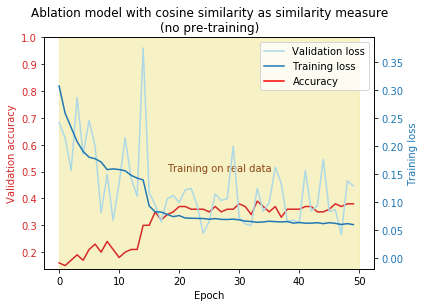


Highest accuracy attained: 0.39



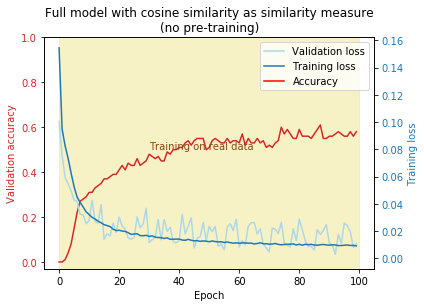


Highest accuracy attained: 0.61



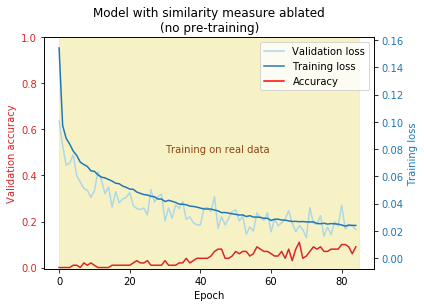


Highest accuracy attained: 0.11



In [47]:
%matplotlib inline

# 20190424-194924.txt, no pretraining, architectue: cosine_sim encoder, ablation
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Validation accuracy', color=color)
ax1.plot(acc_cosim_abl, color=color, label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(top=1)
plt.axvspan(0,len(acc_cosim_abl), color='khaki', alpha=0.5)
plt.text(18,0.5,'Training on real data',color='saddlebrown')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Training loss', color=color)  # we already handled the x-label with ax1
ax2.plot(val_loss_cosim_abl, color='lightblue', label='Validation loss')
ax2.plot(tr_loss_cosim_abl, color=color, label='Training loss')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.set_title('Ablation model with cosine similarity as similarity measure\n(no pre-training)')
ax2.plot(0, color='red', label='Accuracy')
plt.legend(loc='upper right')
plt.show()

print('\nHighest accuracy attained: {0}\n'.format(max(acc_cosim_abl)))


# 20190424-194934.txt, no pretraining, architectue: cosine_sim encoder, full
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Validation accuracy', color=color)
ax1.plot(acc_cosim_full, color=color, label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(top=1)
plt.axvspan(0,len(acc_cosim_full), color='khaki', alpha=0.5)
plt.text(30,0.5,'Training on real data',color='saddlebrown')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Training loss', color=color)  # we already handled the x-label with ax1
ax2.plot(val_loss_cosim_full, color='lightblue', label='Validation loss')
ax2.plot(tr_loss_cosim_full, color=color, label='Training loss')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.set_title('Full model with cosine similarity as similarity measure\n(no pre-training)')
ax2.plot(0, color='red', label='Accuracy')
plt.legend(loc='upper right')
plt.show()

print('\nHighest accuracy attained: {0}\n'.format(max(acc_cosim_full)))


# 20190424-195226.txt, no pretraining, architectue: no_sim encoder, full
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Validation accuracy', color=color)
ax1.plot(acc_nosim_full, color=color, label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(top=1)
plt.axvspan(0,len(acc_nosim_full), color='khaki', alpha=0.5)
plt.text(30,0.5,'Training on real data',color='saddlebrown')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Training loss', color=color)  # we already handled the x-label with ax1
ax2.plot(val_loss_nosim_full, color='lightblue', label='Validation loss')
ax2.plot(tr_loss_nosim_full, color=color, label='Training loss')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.set_title('Model with similarity measure ablated\n(no pre-training)')
ax2.plot(0, color='red', label='Accuracy')
plt.legend(loc='upper right')
plt.show()

print('\nHighest accuracy attained: {0}\n'.format(max(acc_nosim_full)))

In [25]:
!for file in ../gitig/log/20190425*; do echo '\n'; egrep 'note' ${file}; echo ${file}; echo ' (validation accuracy) \n'; egrep 'validation accuracy:' ${file} | grep -Po 'y: \d.\d+' | perl -pe 's/y: /, /; s/\n//'; echo '\nTraining loss:\n'; egrep 'validation accuracy:' ${file} | grep -Po 's: \d.\d+' | perl -pe 's/s: /, /; s/\n//'; echo '\nValidation loss:\n'; egrep 'Validation loss:' ${file} | grep -Po 's: \d.\d+' | perl -pe 's/s: /, /; s/\n//'; done



[note]
note = final experiment, ablation, synpair, architectue: cosine_sim encoder, ablation
../gitig/log/20190425-144930.txt
 (validation accuracy) 

, 0.53, 0.49, 0.49, 0.5, 0.51, 0.49, 0.47, 0.5, 0.48, 0.49, 0.48, 0.47, 0.49, 0.5, 0.48, 0.47, 0.5, 0.42, 0.42, 0.42, 0.42, 0.44, 0.43, 0.43, 0.45, 0.41, 0.44, 0.4, 0.38, 0.38, 0.42, 0.44, 0.4
Training loss:

, 0.4501153865523625, 0.33686747587517607, 0.30562087541032595, 0.29216284733362713, 0.28482885382540757, 0.27984641202641425, 0.2766518755866211, 0.2747257283468704, 0.27327148664309975, 0.2720870139372558, 0.27116614639602865, 0.2705549684677024, 0.2699520786225772, 0.2696741232991321, 0.2689136993289095, 0.2687513616396236, 0.26843050683109815, 0.135664390852273, 0.09524277137898803, 0.09141151734093336, 0.09095691469329635, 0.08428041681155618, 0.08432622444804054, 0.07999453125221734, 0.0763401513120279, 0.07390056640233082, 0.07591216799276325, 0.07116326123313793, 0.07145181912573295, 0.07070105249275213, 0.0705784810065783

In [43]:
# shared encoder architecture, synonym pair pre-training

# 20190425-144930.txt, synpair, architectue: cosine_sim encoder, ablation
acc_syn_cosim_abl = [0.53, 0.49, 0.49, 0.5, 0.51, 0.49, 0.47, 0.5, 0.48, 0.49, 0.48, 0.47, 0.49, 0.5, 0.48, 0.47, 0.5, 0.42, 0.42, 0.42, 0.42, 0.44, 0.43, 0.43, 0.45, 0.41, 0.44, 0.4, 0.38, 0.38, 0.42, 0.44, 0.4]
tr_loss_syn_cosim_abl = [0.4501153865523625, 0.33686747587517607, 0.30562087541032595, 0.29216284733362713, 0.28482885382540757, 0.27984641202641425, 0.2766518755866211, 0.2747257283468704, 0.27327148664309975, 0.2720870139372558, 0.27116614639602865, 0.2705549684677024, 0.2699520786225772, 0.2696741232991321, 0.2689136993289095, 0.2687513616396236, 0.26843050683109815, 0.135664390852273, 0.09524277137898803, 0.09141151734093336, 0.09095691469329635, 0.08428041681155618, 0.08432622444804054, 0.07999453125221734, 0.0763401513120279, 0.07390056640233082, 0.07591216799276325, 0.07116326123313793, 0.07145181912573295, 0.07070105249275213, 0.07057848100657838, 0.0674051359821411, 0.0663516379116922]
val_loss_syn_cosim_abl = [0.08192145471577533, 0.06461370600387455, 0.06209117868245812, 0.11158273952780291, 0.1526131733012153, 0.094824539788533, 0.14206696644192562, 0.06439085730002261, 0.12396536805841606, 0.07239128037355841, 0.04950066763849463, 0.12689911094028503, 0.08582129424758023, 0.08085889463807688, 0.10046282363298814, 0.05873610622889828]
pretrain_syn_cosim_abl = 17

# 20190425-145015.txt, synpair, architectue: cosine_sim encoder, full
acc_syn_cosim_full = [0.43, 0.47, 0.48, 0.44, 0.43, 0.4, 0.36, 0.33, 0.32, 0.32, 0.3, 0.28, 0.3, 0.32, 0.31, 0.33, 0.34, 0.39, 0.4, 0.58, 0.57, 0.57, 0.57, 0.57, 0.56, 0.57, 0.56, 0.56, 0.56, 0.59, 0.57, 0.6, 0.61, 0.62, 0.6, 0.62, 0.62, 0.61, 0.62, 0.63, 0.63, 0.65, 0.64, 0.62, 0.61, 0.6, 0.59, 0.6, 0.6, 0.61, 0.59, 0.57, 0.57, 0.59, 0.6, 0.59, 0.59, 0.58]
tr_loss_syn_cosim_full = [0.4508837268032999, 0.2821538865775537, 0.2460752225666862, 0.22556863268042354, 0.21192975030192318, 0.20287958116367066, 0.19703917335525592, 0.19251169515654057, 0.189596313169377, 0.18672589594336264, 0.18469036152477328, 0.18307363146224953, 0.1818072136577419, 0.1806085873654622, 0.17935830065012193, 0.17828035098088413, 0.1772056081574433, 0.17668248577624254, 0.17597305997642265, 0.051683120497803776, 0.036432750219154736, 0.031279087629414955, 0.028775272994064405, 0.02644578581315554, 0.02472505813524597, 0.0225456311356365, 0.021623131773906124, 0.020603122449049747, 0.01956699419362718, 0.01875558590278979, 0.017757301682564085, 0.017932052672776734, 0.01708860246431405, 0.01658086384246325, 0.01579107634208255, 0.015702333657066865, 0.01586358280496502, 0.015001311250942095, 0.014733759020393523, 0.014479272702981891, 0.014091014850056278, 0.013856686348309163, 0.013301895321472398, 0.013579136373818869, 0.012955604313837514, 0.012886226699497638, 0.012726070461230688, 0.012698091109715067, 0.01268338218751497, 0.011906233262813981, 0.011743364241092413, 0.011497098912424423, 0.011126158501563187, 0.011325234483310489, 0.011072477593169962, 0.011142666998395914, 0.01111038272765778, 0.011079788308843817]
val_loss_syn_cosim_full = [0.04481969146989286, 0.022836911531630904, 0.028078648232039996, 0.033081213891273366, 0.03289490378985647, 0.026767279783671258, 0.03984868125931826, 0.01812360995943891, 0.02113085648350534, 0.011410864672798197, 0.010216547655290923, 0.023236582195677327, 0.025808042715871126, 0.022293452550948133, 0.039785507417982445, 0.017111403491799137, 0.012038004112255293, 0.01400218170365406, 0.018910048590587394, 0.016209172411108738, 0.023089279989908392, 0.021208149516533013, 0.015755887367959076, 0.01596907176954119, 0.008343390181516952, 0.010508218799986934, 0.02336381301480287, 0.018500880474502993, 0.023348996693785012, 0.03568650046021503, 0.015218429947517507, 0.011390962419463904, 0.008064068017893078, 0.02171698760072104, 0.012646729060488724, 0.02183348074816877, 0.023623339717596538, 0.017085041876634934, 0.01891840741755004
]
pretrain_cosim_full = 19

# 20190425-145100.txt, synpair, architectue: no_sim encoder, full
acc_syn_nosim_full = [0.04, 0.09, 0.1, 0.13, 0.2, 0.18, 0.24, 0.29, 0.29, 0.31, 0.3, 0.28, 0.31, 0.35, 0.35, 0.35, 0.39, 0.39, 0.37, 0.38, 0.4, 0.39, 0.39, 0.39, 0.39, 0.4, 0.4, 0.39, 0.39, 0.41, 0.41, 0.42, 0.38, 0.4, 0.4, 0.4, 0.42, 0.39, 0.38, 0.38, 0.4, 0.37, 0.39, 0.4, 0.42, 0.41, 0.44, 0.43, 0.41, 0.43, 0.45, 0.45, 0.44, 0.44, 0.44, 0.45, 0.44, 0.42, 0.45, 0.45, 0.44, 0.43, 0.45, 0.44, 0.44, 0.46, 0.44, 0.48, 0.44, 0.45, 0.46, 0.45, 0.46, 0.48, 0.47, 0.47, 0.46, 0.47, 0.46, 0.46, 0.47, 0.47, 0.48, 0.49, 0.49, 0.48, 0.5, 0.48, 0.49, 0.51, 0.48, 0.48, 0.51, 0.48, 0.49, 0.5, 0.48, 0.46, 0.48, 0.47, 0.54, 0.54, 0.54, 0.53, 0.53, 0.54, 0.52, 0.53, 0.55, 0.53, 0.56, 0.54, 0.57, 0.55, 0.57, 0.6, 0.6, 0.58, 0.57, 0.58, 0.63, 0.6, 0.6, 0.59, 0.59, 0.6, 0.6, 0.61, 0.58, 0.59, 0.59, 0.61, 0.62, 0.58, 0.59, 0.59, 0.59]
tr_loss_syn_nosim_full = [0.563439951734704, 0.42408424263555233, 0.3861451666748907, 0.3589285492413138, 0.33437955639170197, 0.31841190194994273, 0.3076102179876553, 0.29902245729800647, 0.29082850491976475, 0.2832031133342424, 0.27567040598490383, 0.2693495674420471, 0.2633551161076873, 0.2587644576863086, 0.2542846999447298, 0.24988764773373703, 0.24647464418431947, 0.24312751653322776, 0.24071194979019186, 0.23781441432286232, 0.23473015396761057, 0.23325708598558428, 0.23133087627544138, 0.22926081878646748, 0.22790491027316395, 0.22624895531408323, 0.2245144775227254, 0.2226831561384693, 0.22180093362330897, 0.2199270050143264, 0.21897569004479853, 0.21771182183121007, 0.21661603101747823, 0.2150779214675358, 0.2143216063925061, 0.2133490369540493, 0.21245029867097265, 0.21105297340072446, 0.21065597972018488, 0.20944653421606987, 0.20870964502580694, 0.20808750186660357, 0.2076032765411087, 0.20619888680334023, 0.20528372827925778, 0.205179340330056, 0.20492591658060175, 0.20359624413622904, 0.20292053928010442, 0.20272691102671947, 0.20209585771728816, 0.20138570586103682, 0.2009072260197944, 0.200688146038773, 0.20015437447738207, 0.19934891348549286, 0.19912123718346286, 0.19855193230688187, 0.1977914581347956, 0.19794071226299256, 0.19647347794046174, 0.19738574578101747, 0.1969166631872767, 0.19560117080812453, 0.1957502076468992, 0.1954348540529446, 0.19526923611009195, 0.19525185231683836, 0.19422209072088129, 0.19360502561486229, 0.1934575149384311, 0.1925862700283674, 0.1931211840733396, 0.19281224876344263, 0.19213448974677513, 0.19184236607473393, 0.19155684810923093, 0.1916396548192276, 0.19135937269058867, 0.19063140981530594, 0.1907580422862566, 0.19023259081741556, 0.19006059154483232, 0.18960050603776527, 0.1897008245906981, 0.189420483686424, 0.18886939107936465, 0.1887360419568934, 0.18864230070171667, 0.1882454523280838, 0.1886050689923114, 0.18800960783435633, 0.18767265888510912, 0.18775032689251225, 0.18707444723895136, 0.18738068499331176, 0.1867859840918198, 0.1870584598101283, 0.18648517030048875, 0.1861822006743435, 0.04699883801832674, 0.03831710235500794, 0.033585696066988094, 0.03201891337615134, 0.030229475823911205, 0.028795841746939575, 0.027144627408482717, 0.026411369964208738, 0.026230421797145142, 0.02350922042107742, 0.023743383506900077, 0.02286127649421739, 0.02225692138487871, 0.022323770851071952, 0.021582089325654606, 0.020737577495775955, 0.020390079130550583, 0.01985202398635106, 0.01938246052208761, 0.019456688890093166, 0.01907549199042144, 0.018452554598221413, 0.018751070914293608, 0.01788071447047446, 0.018008098425636897, 0.017901186528058114, 0.01802425054791587, 0.01765689262330456, 0.017442866735096957, 0.01716147555994888, 0.01624911018245692, 0.016803544141585997, 0.016000896831968377, 0.016318989298101032, 0.015336844653465588, 0.015332391818570221, 0.015687636467809997]
val_loss_syn_nosim_full = [0.03758736319374293, 0.021155006672197486, 0.021398818810848753, 0.02463995337515371, 0.02824450132837228, 0.029612582130430384, 0.023821249553075175, 0.02454000699734024, 0.01772041167678253, 0.016006255992761, 0.012072191857987491, 0.02097311878498658, 0.020582082791734138, 0.02135331498218875, 0.029596357224945677, 0.016091606526315444, 0.01584503368489095, 0.015006157531738609, 0.015493219896534356, 0.02106221840828084, 0.023181379015309176, 0.019231682182817168, 0.013144766449568124, 0.011895320901239757, 0.009024477978716732, 0.010098783696109876, 0.018038033132070266, 0.01933973455346404, 0.020137325791620243, 0.025028108656706537, 0.01276806137222593, 0.015372244714244516, 0.009595513211247636, 0.01740166199221221, 0.013338983301946428, 0.022350098154993246, 0.01940277516439892]
pretrain_nosim_full = 100

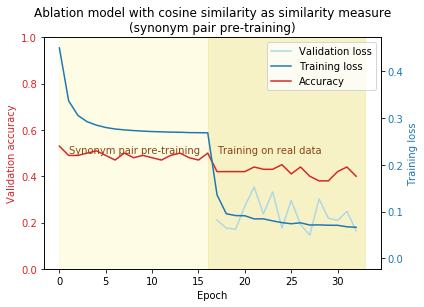


Highest accuracy attained: 0.53



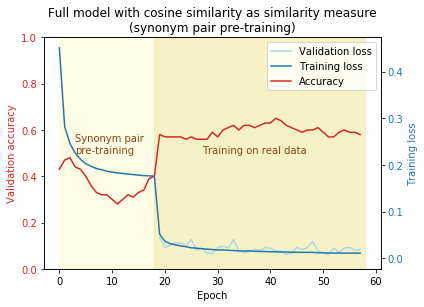


Highest accuracy attained: 0.65



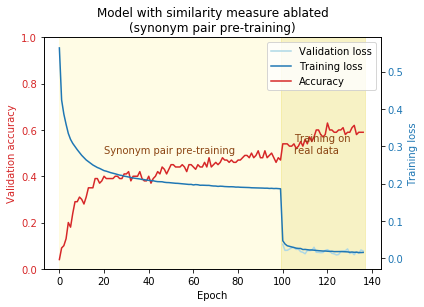


Highest accuracy attained: 0.63



In [52]:
# 20190425-144930.txt, synpair, architectue: cosine_sim encoder, ablation

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Validation accuracy', color=color)
ax1.plot(acc_syn_cosim_abl, color='tab:red',label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(bottom=0,top=1)
plt.axvspan(0, pretrain_syn_cosim_abl-1, color='lemonchiffon', alpha=0.5)
plt.axvspan(pretrain_syn_cosim_abl-1,len(acc_syn_cosim_abl), color='khaki', alpha=0.5)
plt.text(1,0.5,'Synonym pair pre-training',color='saddlebrown')
plt.text(17,0.5,'Training on real data',color='saddlebrown')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Training loss', color=color)  # we already handled the x-label with ax1
ax2.plot([*range(pretrain_syn_cosim_abl,len(acc_syn_cosim_abl))],val_loss_syn_cosim_abl, color='lightblue',label='Validation loss')
ax2.plot(tr_loss_syn_cosim_abl, color=color,label='Training loss')
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(0, color='tab:red',label='Accuracy')
plt.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.set_title('Ablation model with cosine similarity as similarity measure\n(synonym pair pre-training)')
plt.show()

print('\nHighest accuracy attained: {0}\n'.format(max(acc_syn_cosim_abl)))


# 20190425-145015.txt, synpair, architectue: cosine_sim encoder, full

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Validation accuracy', color=color)
ax1.plot(acc_syn_cosim_full, color='tab:red',label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(bottom=0,top=1)
plt.axvspan(0, pretrain_cosim_full-1, color='lemonchiffon', alpha=0.5)
plt.axvspan(pretrain_cosim_full-1,len(acc_syn_cosim_full), color='khaki', alpha=0.5)
plt.text(3,0.5,'Synonym pair\npre-training',color='saddlebrown')
plt.text(27,0.5,'Training on real data',color='saddlebrown')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Training loss', color=color)  # we already handled the x-label with ax1
ax2.plot([*range(pretrain_cosim_full,len(acc_syn_cosim_full))],val_loss_syn_cosim_full, color='lightblue',label='Validation loss')
ax2.plot(tr_loss_syn_cosim_full, color=color,label='Training loss')
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(0, color='tab:red',label='Accuracy')
plt.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.set_title('Full model with cosine similarity as similarity measure\n(synonym pair pre-training)')
plt.show()

print('\nHighest accuracy attained: {0}\n'.format(max(acc_syn_cosim_full)))

# 20190425-145100.txt, synpair, architectue: no_sim encoder, full

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Validation accuracy', color=color)
ax1.plot(acc_syn_nosim_full, color='tab:red',label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(bottom=0,top=1)
plt.axvspan(0, pretrain_nosim_full-1, color='lemonchiffon', alpha=0.5)
plt.axvspan(pretrain_nosim_full-1,len(acc_syn_nosim_full), color='khaki', alpha=0.5)
plt.text(20,0.5,'Synonym pair pre-training',color='saddlebrown')
plt.text(105,0.5,'Training on\nreal data',color='saddlebrown')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Training loss', color=color)  # we already handled the x-label with ax1
ax2.plot([*range(pretrain_nosim_full,len(acc_syn_nosim_full))],val_loss_syn_nosim_full, color='lightblue',label='Validation loss')
ax2.plot(tr_loss_syn_nosim_full, color=color,label='Training loss')
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(0, color='tab:red',label='Accuracy')
plt.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.set_title('Model with similarity measure ablated\n(synonym pair pre-training)')
plt.show()

print('\nHighest accuracy attained: {0}\n'.format(max(acc_syn_nosim_full)))

In [40]:
print(len(val_loss_syn_cosim_full))
print(len(tr_loss_syn_cosim_full))
print(len(acc_syn_cosim_full))

39
58
58
